#### Data cleaning
1. Missing
2. Bad Noise
3. Outliers

To manage
Outliers and bad noise -- remove\


Range of outliers ( -inf,-3 * SD] U [ 3 * SD, inf )
or
IQR method

np.percentile to find the percentile
(Q1-IQR] , [Q3+IQR]

#### Bad Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tips = pd.read_csv('/home/rishav/Desktop/globsyn-python-intern-training/Dataset/tips_bad.csv')

In [3]:
def removing_outliers(dirty):
    Q1=dirty.quantile(0.25)
    Q3=dirty.quantile(0.75)
    IQR=Q3-Q1
    cleaned=dirty[~((dirty<(Q1-1.5*IQR)) | (dirty>(Q3+1.5*IQR)))]
    return cleaned

In [4]:
print(tips.sample(10))

     total_bill   tip     sex smoker   day    time size
125       29.80  4.20  Female     No  Thur   Lunch    6
63        18.29  3.76    Male    Yes   Sat  Dinner    4
65        20.08  3.15    Male     No   Sat  Dinner    3
95        40.17  4.73    Male    Yes   Fri  Dinner    4
216       28.15  3.00    Male    Yes   Sat  Dinner    5
106       20.49  4.06    Male    Yes   Sat  Dinner    2
70        12.02  1.97    Male     No   Sat  Dinner    2
6          8.77  2.00    Male     No   Sun  Dinner    2
43         9.68  1.32    Male     No   Sun  Dinner    2
102       44.30  2.50  Female    Yes   Sat  Dinner    3


In [5]:
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  241 non-null    float64
 1   tip         241 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         243 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    object 
dtypes: float64(2), object(5)
memory usage: 13.5+ KB
None


In [6]:
tips.isna().sum()

total_bill    3
tip           3
sex           0
smoker        0
day           1
time          0
size          0
dtype: int64

In [7]:
print(tips['day'].value_counts())
print("\n")
print(tips['day'].describe())

day
Sat     87
Sun     76
Thur    61
Fri     19
Name: count, dtype: int64


count     243
unique      4
top       Sat
freq       87
Name: day, dtype: object


In [8]:
print(tips['sex'].value_counts())
#print(tips['smoker'].value_counts())


sex
Male      156
Female     84
?           4
Name: count, dtype: int64


In [9]:
max_gender = tips['sex'].value_counts().idxmax()
tips['sex']=tips['sex'].replace('?',max_gender)

In [10]:
tips['sex'].value_counts()

sex
Male      160
Female     84
Name: count, dtype: int64

In [11]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
tips['size'].value_counts()

size
2    154
3     38
4     37
5      5
1      4
6      4
?      2
Name: count, dtype: int64

In [13]:
tips['size']=pd.to_numeric(tips['size'], errors='coerce', downcast="integer")
tips.isna().sum() 

total_bill    3
tip           3
sex           0
smoker        0
day           1
time          0
size          2
dtype: int64

In [14]:
tips['size'].value_counts()

size
2.0    154
3.0     38
4.0     37
5.0      5
1.0      4
6.0      4
Name: count, dtype: int64

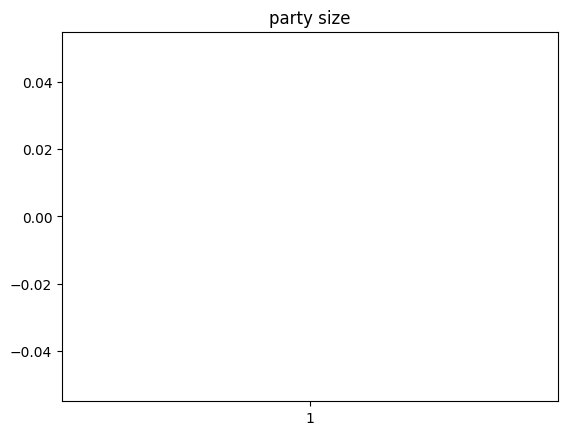

In [15]:
plt.figure()
plt.title("party size")
plt.boxplot(tips['size'])

plt.show()

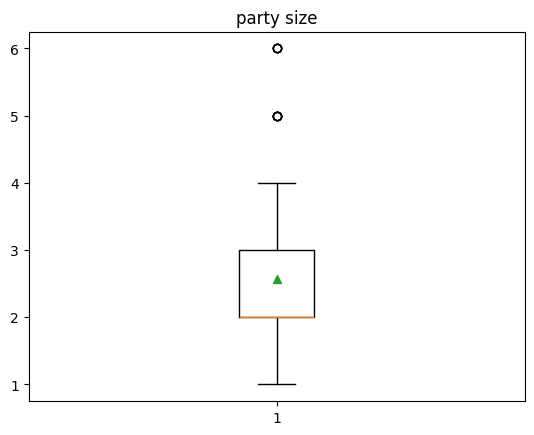

In [16]:
tips_cleaned = tips
tips_cleaned=tips['size'].dropna()
tips_cleaned.isna().sum()   
plt.figure()
plt.title("party size")
plt.boxplot(tips_cleaned,showmeans=True)
plt.show()

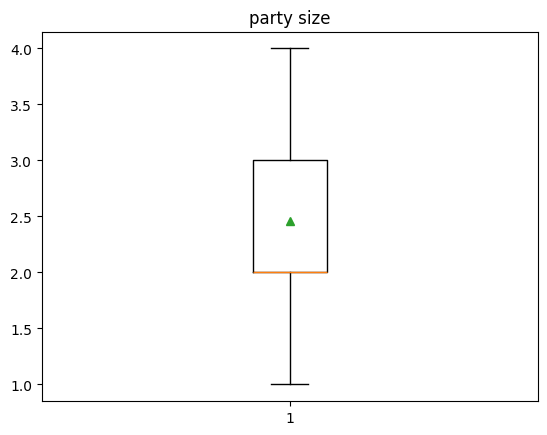

In [17]:
tips_cleaned = tips
tips_cleaned=tips['size'].dropna()
tips_cleaned.isna().sum()   

tips_cleaned=removing_outliers(tips_cleaned)

plt.figure()
plt.title("party size")
plt.boxplot(tips_cleaned,showmeans=True)
plt.show()

     total_bill    tip     sex smoker   day    time  size
67         3.07   1.00  Female    Yes   Sat  Dinner   1.0
92         5.75   1.00  Female    Yes   Fri  Dinner   2.0
172        7.25   5.15    Male    Yes   Sun  Dinner   2.0
111        7.25   1.00  Female     No   Sat  Dinner   1.0
149        7.51   2.00    Male     No  Thur   Lunch   2.0
..          ...    ...     ...    ...   ...     ...   ...
212       48.33   9.00    Male     No   Sat  Dinner   4.0
170       50.81  10.00    Male    Yes   Sat  Dinner   3.0
31          NaN   2.50    Male     No   Sat  Dinner   4.0
52          NaN   5.20    Male     No   Sun  Dinner   4.0
210         NaN   2.00    Male    Yes   Sat  Dinner   3.0

[244 rows x 7 columns]


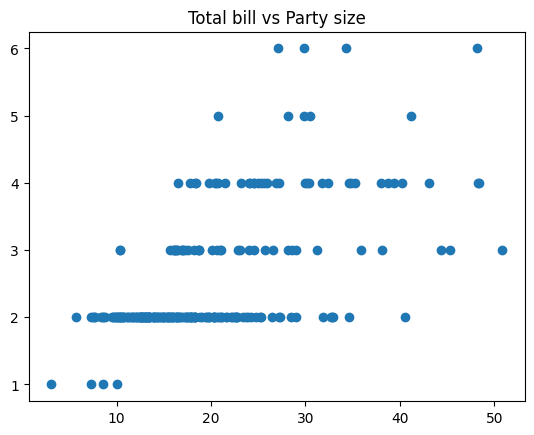

In [18]:
df1=tips.sort_values(['total_bill'])
print(df1)
plt.figure()
plt.title("Total bill vs Party size")
plt.scatter(df1.total_bill,df1['size'])
plt.show()


/tmp/ipykernel_2905/353738795.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


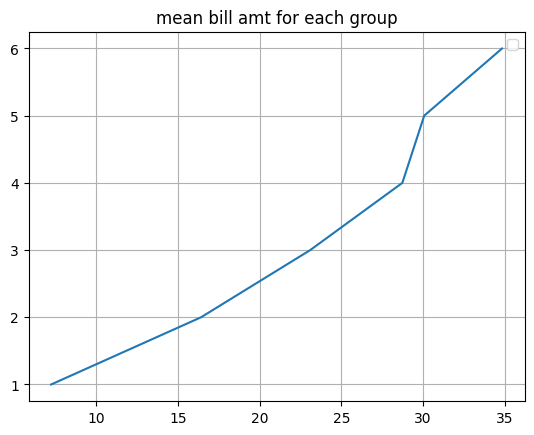

In [19]:
df2=tips.groupby('size')['total_bill'].mean()
#print(df2)
plt.figure()
plt.title("mean bill amt for each group")
plt.plot(df2.values,df2.index)
plt.legend()
plt.grid()
plt.show()

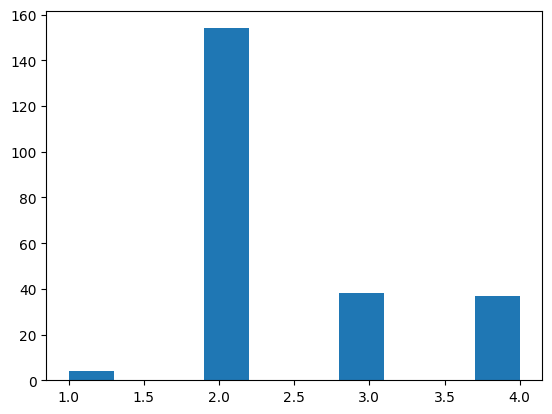

In [20]:
plt.figure()
plt.hist(tips_cleaned)
plt.show()

In [21]:
tips['total_bill'].info
tips['total_bill'].isna().sum()

3

In [22]:
bills_cleaned = tips['total_bill'].dropna()
bills_cleaned.isna().sum()

0

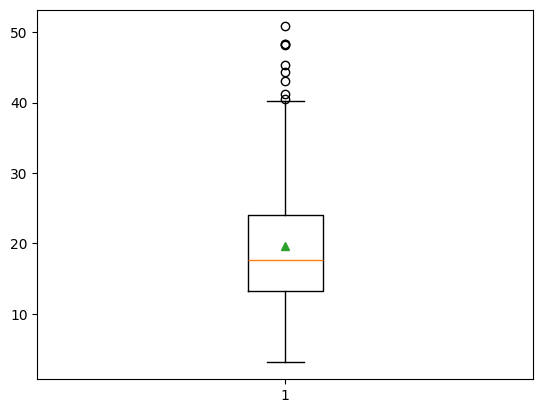

In [23]:
plt.figure()
plt.boxplot(bills_cleaned,showmeans=True)
plt.show()

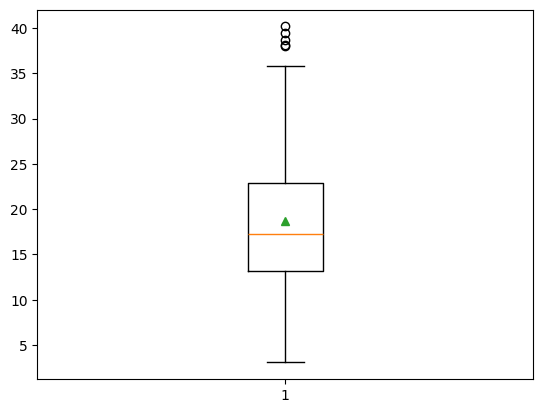

In [24]:
bills_cleaned=removing_outliers(bills_cleaned)

plt.figure()
plt.boxplot(bills_cleaned,showmeans=True)
plt.show()


In [25]:
print(tips.isna().sum())
mean_bills=tips['total_bill'].mean()
print(mean_bills)

total_bill    3
tip           3
sex           0
smoker        0
day           1
time          0
size          2
dtype: int64
19.686929460580913


In [26]:
tips['total_bill']=tips['total_bill'].fillna(mean_bills)
print(tips.isna().sum())

total_bill    0
tip           3
sex           0
smoker        0
day           1
time          0
size          2
dtype: int64


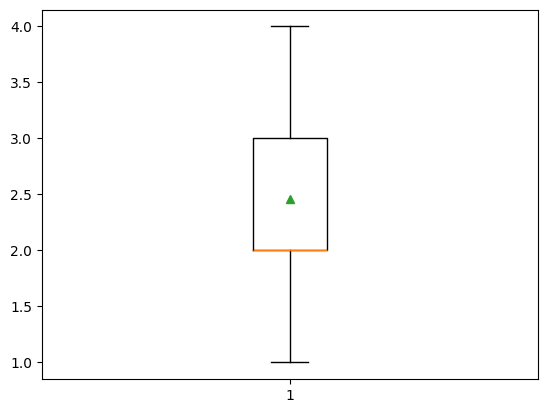

In [27]:
tips_cleaned=removing_outliers(tips_cleaned)

plt.figure()
plt.boxplot(tips_cleaned,showmeans=True)
plt.show()